In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("iris.csv" , names = ['Sepal_length' , 'Sepal_width' , 'Petal_length' , 'Petal_width'])
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 150 entries, 5.1 to 5.9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.9+ KB


In [8]:
target_df = df.drop(['Petal_length' , 'Petal_width'] , axis = 1)
target_df.head()

,Sepal_length,Sepal_width
5.1,3.5,1.4
4.9,3.0,1.4
4.7,3.2,1.3
4.6,3.1,1.5
5.0,3.6,1.4


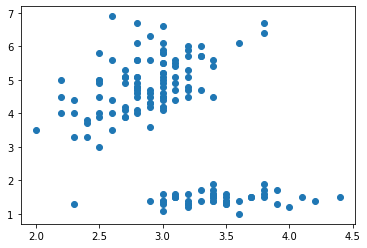

In [10]:
from matplotlib import pyplot as plt
plt.scatter(target_df.Sepal_length , target_df.Sepal_width)
plt.show()

In [16]:
km = KMeans(n_clusters = 2)
y_predict = km.fit_predict(target_df)

In [17]:
target_df['Cluster'] = y_predict
target_df.head()

,Sepal_length,Sepal_width,Cluster
5.1,3.5,1.4,1
4.9,3.0,1.4,1
4.7,3.2,1.3,1
4.6,3.1,1.5,1
5.0,3.6,1.4,1


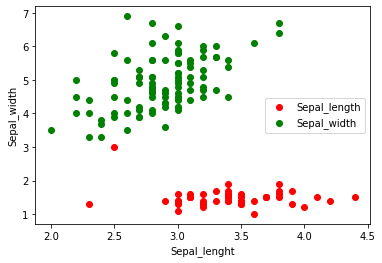

In [26]:
x = target_df[target_df.Cluster == 1]
y = target_df[target_df.Cluster == 0]
plt.scatter(x.Sepal_length , x.Sepal_width , color = 'red' , label = 'Sepal_length')
plt.scatter(y.Sepal_length , y.Sepal_width , color = 'green' , label = 'Sepal_width')
plt.xlabel("Sepal_lenght")
plt.ylabel("Sepal_width")
plt.legend()

In [29]:
scaler = MinMaxScaler()
scaler.fit(target_df[['Sepal_length']])
target_df['Sepal_length'] = scaler.transform(target_df[['Sepal_length']])

In [30]:
scaler.fit(target_df[['Sepal_width']])
target_df['Sepal_width'] = scaler.transform(target_df[['Sepal_width']])
target_df.head()

,Sepal_length,Sepal_width,Cluster
5.1,0.625000,0.067797,1
4.9,0.416667,0.067797,1
4.7,0.500000,0.050847,1
4.6,0.458333,0.084746,1
5.0,0.666667,0.067797,1


In [36]:
km = KMeans(n_clusters = 2)
y_predict = km.fit_predict(target_df[['Sepal_length' , 'Sepal_width']])
target_df['Cluster'] = y_predict
target_df.head()
km.cluster_centers_

array([[0.36333333, 0.6620339 ],
       [0.59083333, 0.07864407]])

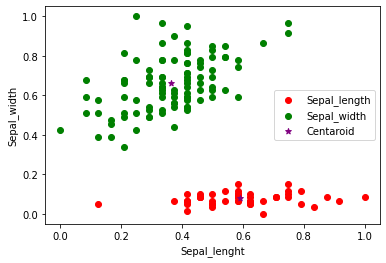

In [47]:
x = target_df[target_df.Cluster == 1]
y = target_df[target_df.Cluster == 0]
plt.scatter(x.Sepal_length , x.Sepal_width , color = 'red' , label = 'Sepal_length')
plt.scatter(y.Sepal_length , y.Sepal_width , color = 'green' , label = 'Sepal_width')
plt.xlabel("Sepal_lenght")
plt.ylabel("Sepal_width")
plt.scatter(km.cluster_centers_[:,0] , km.cluster_centers_[:,1] , marker = '*' , color = 'purple' , label = 'Centaroid')
plt.legend()

In [46]:
x = km.cluster_centers_[:,0] 
y = km.cluster_centers_[:,1]
print(x,y)

[0.36333333 0.59083333] [0.6620339  0.07864407]
